## LSTM(Long Short-Term Memory)
- RNN은 대부분 LSTM
- long-term dependency : 좀 더 많은 이전 state들이 현재 state에 반영될 수 있게 함.
- 사용하는 data들
    - 현재 input
    - 과거 output
    - cell state : 하나의 cell에서 다른 cell로 정보를 전달
- 3개의 gate
    - cell 간의 정보 흐름을 control
    - info의 유지, 변경 제어
    - 과거와 현재 iput이 현재 cell state와 output에 얼마나 영향 미칠지 제어
- RNN 보다 Vanishing gradient가 적어 training이 잘 됨

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model

In [2]:
# parameters for data load
num_words = 30000
maxlen = 50
test_split = 0.3

In [3]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = num_words, maxlen = maxlen, test_split = test_split)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1395,) (1395,) (599,) (599,)


D:\Program Files\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
D:\Program Files\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
# post : 50개의 단어가 되지 않은 sequence는 뒤쪽을 0으로 채움. 이걸 붙이지 않으면 앞쪽으로 0이 채워짐. 
X_train = pad_sequences(X_train, padding="post")
X_test = pad_sequences(X_train, padding="post")
print(X_train.shape, X_test.shape)

(1395, 49) (1395, 49)


In [5]:
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape, X_test.shape)

(1395, 49, 1) (1395, 49, 1)


In [6]:
y_data = np.concatenate((y_train, y_test))
y_data = to_categorical(y_data)
print(y_data.shape)

(1994, 46)


In [7]:
y_train = y_data[:1395]
y_test = y_data[:1395]
print(y_train.shape, y_test.shape)

(1395, 46) (1395, 46)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [12]:
def lstm():
    model = Sequential()
    model.add(LSTM(50, input_shape=(49, 1), return_sequences = False))
    model.add(Dense(46))
    model.add(Activation('softmax'))
    adam = optimizers.Adam(learning_rate=0.001)
    model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=['accuracy'])
    
    return model

In [13]:
model = lstm()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 46)                2346      
_________________________________________________________________
activation (Activation)      (None, 46)                0         
Total params: 12,746
Trainable params: 12,746
Non-trainable params: 0
_________________________________________________________________


In [14]:
%%time
history = model.fit(X_train, y_train, batch_size=50, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
23/23 [==============================] - 4s 65ms/step - loss: 3.4300 - accuracy: 0.5538 - val_loss: 2.4568 - val_accuracy: 0.7240
Epoch 2/100
23/23 [==============================] - 1s 24ms/step - loss: 1.6967 - accuracy: 0.7124 - val_loss: 1.2158 - val_accuracy: 0.7240
Epoch 3/100
23/23 [==============================] - 1s 25ms/step - loss: 1.2176 - accuracy: 0.7124 - val_loss: 1.1040 - val_accuracy: 0.7240
Epoch 4/100
23/23 [==============================] - 1s 24ms/step - loss: 1.1620 - accuracy: 0.7124 - val_loss: 1.0810 - val_accuracy: 0.7240
Epoch 5/100
23/23 [==============================] - 1s 26ms/step - loss: 1.1420 - accuracy: 0.7124 - val_loss: 1.0689 - val_accuracy: 0.7240
Epoch 6/100
23/23 [==============================] - 1s 24ms/step - loss: 1.1311 - accuracy: 0.7124 - val_loss: 1.0646 - val_accuracy: 0.7240
Epoch 7/100
23/23 [==============================] - 1s 23ms/step - loss: 1.1211 - accuracy: 0.7124 - val_loss: 1.0561 - val_accuracy: 0.7240
Epoch 

23/23 [==============================] - 1s 24ms/step - loss: 0.7035 - accuracy: 0.8217 - val_loss: 0.7491 - val_accuracy: 0.8387
Epoch 59/100
23/23 [==============================] - 1s 24ms/step - loss: 0.7138 - accuracy: 0.8217 - val_loss: 0.7331 - val_accuracy: 0.8315
Epoch 60/100
23/23 [==============================] - 1s 23ms/step - loss: 0.7060 - accuracy: 0.8217 - val_loss: 0.7209 - val_accuracy: 0.8351
Epoch 61/100
23/23 [==============================] - 1s 23ms/step - loss: 0.7221 - accuracy: 0.8208 - val_loss: 0.7472 - val_accuracy: 0.8244
Epoch 62/100
23/23 [==============================] - 1s 24ms/step - loss: 0.7222 - accuracy: 0.8217 - val_loss: 0.7483 - val_accuracy: 0.8280
Epoch 63/100
23/23 [==============================] - 1s 23ms/step - loss: 0.7064 - accuracy: 0.8262 - val_loss: 0.7339 - val_accuracy: 0.8351
Epoch 64/100
23/23 [==============================] - 1s 24ms/step - loss: 0.6997 - accuracy: 0.8271 - val_loss: 0.7538 - val_accuracy: 0.8315
Epoch 65/100

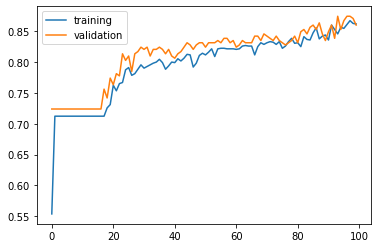

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [16]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

44/44 [==============================] - 0s 9ms/step - loss: 0.5684 - accuracy: 0.8631
Test accuracy:  0.8630824089050293


## Bidirectional RNN 
- 양방향 RNN(순방향, 역방향 순서 고려)

In [17]:
from tensorflow.keras.layers import Bidirectional

In [20]:
def bidirectional_lstm():
    model = Sequential()
    model.add(Bidirectional(LSTM(20, return_sequences = False), input_shape=(49, 1)))
    model.add(Dense(46))
    model.add(Activation('softmax'))
    adam = optimizers.Adam(learning_rate=0.001)
    model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=['accuracy'])
    
    return model

In [21]:
model = bidirectional_lstm()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 40)                3520      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                1886      
_________________________________________________________________
activation_2 (Activation)    (None, 46)                0         
Total params: 5,406
Trainable params: 5,406
Non-trainable params: 0
_________________________________________________________________


In [22]:
%time
history = model.fit(X_train, y_train, batch_size = 50, epochs = 100, validation_split = 0.2, verbose = 1)

Wall time: 0 ns
Epoch 1/100
23/23 [==============================] - 5s 55ms/step - loss: 3.6956 - accuracy: 0.0493 - val_loss: 3.2487 - val_accuracy: 0.4839
Epoch 2/100
23/23 [==============================] - 0s 18ms/step - loss: 2.6919 - accuracy: 0.7016 - val_loss: 2.0234 - val_accuracy: 0.7240
Epoch 3/100
23/23 [==============================] - 0s 20ms/step - loss: 1.6772 - accuracy: 0.7124 - val_loss: 1.2978 - val_accuracy: 0.7240
Epoch 4/100
23/23 [==============================] - 1s 22ms/step - loss: 1.2517 - accuracy: 0.7124 - val_loss: 1.1175 - val_accuracy: 0.7240
Epoch 5/100
23/23 [==============================] - 0s 19ms/step - loss: 1.1638 - accuracy: 0.7124 - val_loss: 1.0665 - val_accuracy: 0.7240
Epoch 6/100
23/23 [==============================] - 0s 19ms/step - loss: 1.1227 - accuracy: 0.7124 - val_loss: 1.0369 - val_accuracy: 0.7240
Epoch 7/100
23/23 [==============================] - 1s 23ms/step - loss: 1.0830 - accuracy: 0.7124 - val_loss: 0.9922 - val_accurac

Epoch 58/100
23/23 [==============================] - 0s 22ms/step - loss: 0.6640 - accuracy: 0.8369 - val_loss: 0.6312 - val_accuracy: 0.8781
Epoch 59/100
23/23 [==============================] - 1s 24ms/step - loss: 0.6716 - accuracy: 0.8387 - val_loss: 0.6319 - val_accuracy: 0.8710
Epoch 60/100
23/23 [==============================] - 0s 21ms/step - loss: 0.6640 - accuracy: 0.8387 - val_loss: 0.6344 - val_accuracy: 0.8710
Epoch 61/100
23/23 [==============================] - 1s 23ms/step - loss: 0.6600 - accuracy: 0.8396 - val_loss: 0.6394 - val_accuracy: 0.8710
Epoch 62/100
23/23 [==============================] - 1s 22ms/step - loss: 0.6716 - accuracy: 0.8405 - val_loss: 0.6753 - val_accuracy: 0.8530
Epoch 63/100
23/23 [==============================] - 1s 24ms/step - loss: 0.6579 - accuracy: 0.8387 - val_loss: 0.6290 - val_accuracy: 0.8746
Epoch 64/100
23/23 [==============================] - 1s 23ms/step - loss: 0.6565 - accuracy: 0.8432 - val_loss: 0.6375 - val_accuracy: 0.8710

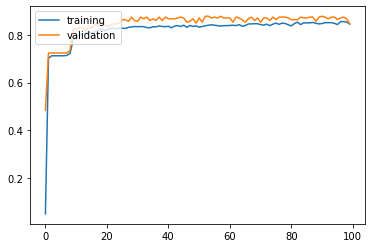

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [24]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

44/44 [==============================] - 0s 5ms/step - loss: 0.6182 - accuracy: 0.8430
Test accuracy:  0.8430107235908508
